<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importamos los datos

X_train = pd.read_csv("./DatosAbandonoSinPondSinNanSub/X_train.csv", sep=',', decimal='.')
y_train = pd.read_csv("./DatosAbandonoSinPondSinNanSub/y_train.csv", sep=',', decimal='.')
#X_val = pd.read_csv("./DatosAbandonoSinPondSinNan/X_val.csv", sep=',', decimal='.')
#y_val = pd.read_csv("./DatosAbandonoSinPondSinNan/y_val.csv", sep=',', decimal='.')
X_test = pd.read_csv("./DatosAbandonoSinPondSinNanSub/X_test.csv", sep=',', decimal='.')
y_test = pd.read_csv("./DatosAbandonoSinPondSinNanSub/y_test.csv", sep=',', decimal='.')


features = X_train.columns

### Vemos si somos capaces de mejorar los algoritmos por defecto aplicando GridSearchCV

In [4]:
start_time = time.time()

dt = DecisionTreeClassifier(random_state = 0)

gs_dt = GridSearchCV(dt,
                    param_grid = {"max_depth" : range(2, 10), 
                                  "min_samples_split": range(4, 10, 2)},
                    scoring = None,
                    cv = 5)
gs_dt.fit(X_train, y_train)
gs_dt.best_estimator_

end_time = time.time()
print("Tiempo: ", end_time - start_time)


Tiempo:  21.364591360092163


In [5]:
gs_dt.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_split=4, random_state=0)

In [6]:
gs_dt.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [7]:
start_time = time.time()

rf = RandomForestClassifier(random_state=0)
gs_rf = GridSearchCV(rf,
                    param_grid = {"max_depth": range(2,6), "min_samples_split": range(4,6,2), "n_estimators": range(100, 251, 50)},
                    scoring = None,
                    cv = 5)
gs_rf.fit(X_train, y_train)

end_time = time.time()
print("Tiempo: ", end_time - start_time)


Tiempo:  224.22176885604858


In [8]:
gs_rf.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=150,
                       random_state=0)

In [9]:
gs_rf.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [10]:
start_time = time.time()

et = ExtraTreesClassifier(random_state=0)
gs_et = GridSearchCV(et,
                    param_grid = {"max_depth": range(2,6), "min_samples_split": range(4,10,2), "n_estimators": range(100, 251, 50)},
                    scoring = None,
                    cv = 5)
gs_et.fit(X_train, y_train)

end_time = time.time()
print("Tiempo: ", end_time - start_time)


Tiempo:  88.46628618240356


In [11]:
gs_et.best_estimator_

ExtraTreesClassifier(max_depth=5, min_samples_split=8, n_estimators=200,
                     random_state=0)

In [12]:
gs_et.best_estimator_.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [13]:
print("DecisionTreeClassifier best score:", gs_dt.best_score_)
print("RandomForestClassifier best score:", gs_rf.best_score_)
print("ExtraTreesClassifier best score:", gs_et.best_score_)

DecisionTreeClassifier best score: 0.6496430367018602
RandomForestClassifier best score: 0.6466796674639812
ExtraTreesClassifier best score: 0.6226528059207798


In [14]:
grid_predictions_dt = gs_dt.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions_dt))
print(confusion_matrix(y_test, grid_predictions_dt))

              precision    recall  f1-score   support

         0.0       0.79      0.54      0.64      4317
         1.0       0.08      0.06      0.07       579
         2.0       0.35      0.75      0.47      1340

    accuracy                           0.54      6236
   macro avg       0.41      0.45      0.39      6236
weighted avg       0.63      0.54      0.55      6236

[[2333  319 1665]
 [ 307   32  240]
 [ 297   33 1010]]


In [15]:
grid_predictions_rf = gs_rf.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions_rf))
print(confusion_matrix(y_test, grid_predictions_rf))

              precision    recall  f1-score   support

         0.0       0.79      0.55      0.65      4317
         1.0       0.09      0.04      0.05       579
         2.0       0.35      0.77      0.48      1340

    accuracy                           0.55      6236
   macro avg       0.41      0.45      0.40      6236
weighted avg       0.63      0.55      0.56      6236

[[2381  238 1698]
 [ 318   23  238]
 [ 299    6 1035]]


In [16]:
grid_predictions_et = gs_et.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions_et))
print(confusion_matrix(y_test, grid_predictions_et))

              precision    recall  f1-score   support

         0.0       0.80      0.67      0.73      4317
         1.0       0.09      0.02      0.03       579
         2.0       0.39      0.71      0.50      1340

    accuracy                           0.62      6236
   macro avg       0.43      0.47      0.42      6236
weighted avg       0.64      0.62      0.62      6236

[[2912  111 1294]
 [ 356   12  211]
 [ 390    4  946]]


In [17]:
from joblib import dump, load
dump(gs_dt, 'gs_dt.joblib') 
dump(gs_rf, 'gs_rf.joblib') 
dump(gs_et, 'gs_et.joblib') 

['gs_et.joblib']

### Decision Tree Classifier

In [18]:
start_time = time.time()

dt = DecisionTreeClassifier(
    ccp_alpha = 0.0,
    class_weight = None,
    criterion = 'gini',
    max_depth = 4,
    max_features = None,
    max_leaf_nodes = None,
    min_impurity_decrease = 0.0,
    min_samples_leaf = 1,
    min_samples_split = 4,
    min_weight_fraction_leaf = 0.0,
    random_state =  0,
    splitter = 'best')

dt_score = cross_val_score(dt, X_train, y_train, cv = 5).mean()
end_time = time.time()
print("Tiempo: ", end_time - start_time)
print("Score: ", dt_score)

Tiempo:  0.6477882862091064
Score:  0.6496430367018602


In [19]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=4, random_state=0)

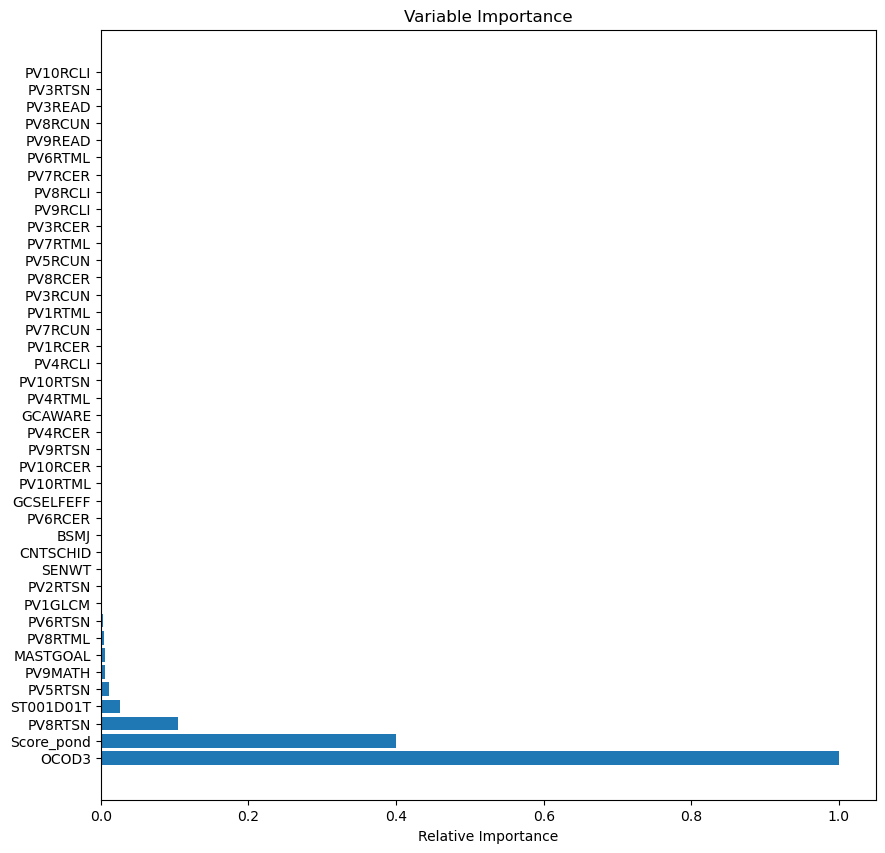

In [20]:
importances = dt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Esto es normal que ocurra porque el árbol de decisión no tiene encuenta nuestra variable para formar el árbol

### Random Forest Classifier

In [21]:
start_time = time.time()

#rf = RandomForestClassifier(max_depth=5, min_samples_split=4, random_state=0) 
rf = RandomForestClassifier(
    bootstrap = True,
    ccp_alpha = 0.0,
    class_weight = None,
    criterion = 'gini',
    max_depth = 5,
    max_features = 'sqrt',
    max_leaf_nodes = None,
    max_samples = None,
    min_impurity_decrease = 0.0,
    min_samples_leaf = 1,
    min_samples_split = 4,
    min_weight_fraction_leaf = 0.0,
    n_estimators =  150,
    n_jobs = None,
    oob_score = False,
    random_state = 0,
    verbose = 0,
    warm_start = False)

rf_score = cross_val_score(rf, X_train, y_train, cv = 10).mean()
end_time = time.time()
print("Tiempo: ", end_time - start_time)
print("Score: ", rf_score)

Tiempo:  31.98337745666504
Score:  0.6498169130387697


In [22]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=150,
                       random_state=0)

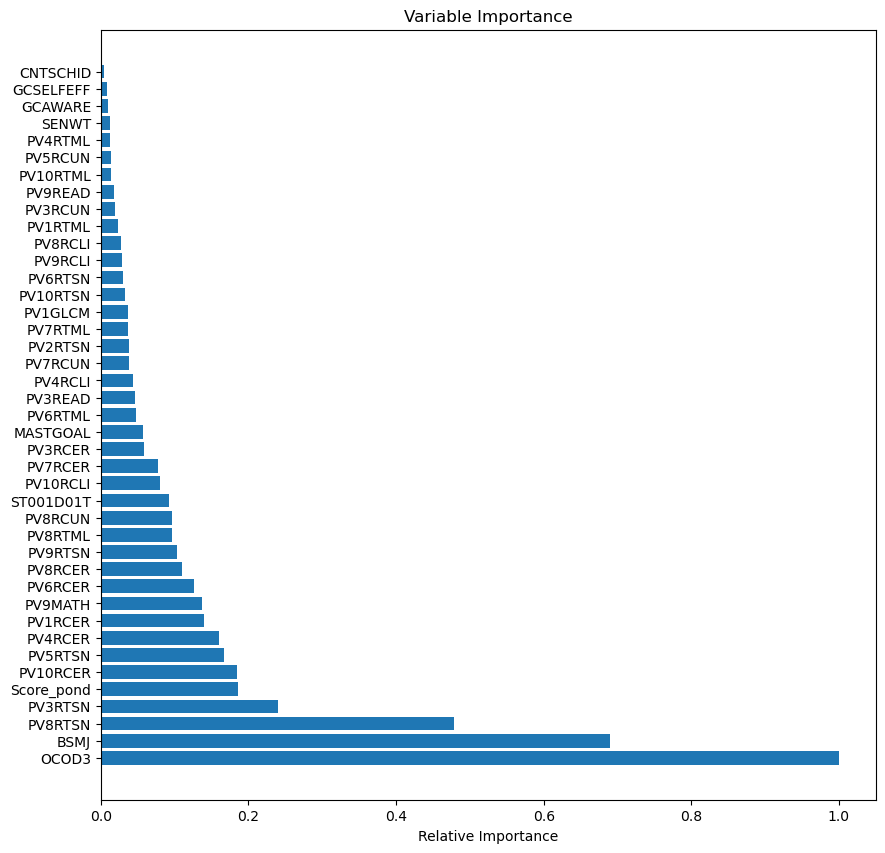

In [23]:
importances = rf.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [24]:
valores = list(zip(importances[indices], features[indices]))

def clave_ordenacion(tupla):
  return (-tupla[0], tupla[1])

sorted(valores, key=clave_ordenacion)

[(1.0, 'OCOD3'),
 (0.6891522376282551, 'BSMJ'),
 (0.4784470600714964, 'PV8RTSN'),
 (0.2395511576290795, 'PV3RTSN'),
 (0.18544582305926244, 'Score_pond'),
 (0.18411912007783246, 'PV10RCER'),
 (0.16669923147452126, 'PV5RTSN'),
 (0.16004798749124924, 'PV4RCER'),
 (0.1401475552354717, 'PV1RCER'),
 (0.13680468957418976, 'PV9MATH'),
 (0.12630830535923673, 'PV6RCER'),
 (0.10982338045187684, 'PV8RCER'),
 (0.10293755928593698, 'PV9RTSN'),
 (0.09666005861321784, 'PV8RTML'),
 (0.09583362548272072, 'PV8RCUN'),
 (0.0917408616129861, 'ST001D01T'),
 (0.07962709723385276, 'PV10RCLI'),
 (0.07737129083140774, 'PV7RCER'),
 (0.05781765763760265, 'PV3RCER'),
 (0.05738450411594383, 'MASTGOAL'),
 (0.04751824490613181, 'PV6RTML'),
 (0.046433549105903325, 'PV3READ'),
 (0.043218382464590935, 'PV4RCLI'),
 (0.03864317680150682, 'PV7RCUN'),
 (0.03786538360338863, 'PV2RTSN'),
 (0.036748838508489416, 'PV7RTML'),
 (0.03627821960892664, 'PV1GLCM'),
 (0.03234944974916148, 'PV10RTSN'),
 (0.029663928595938107, 'PV6RTSN')

### Extra Trees Classifier

In [25]:
start_time = time.time()

et = ExtraTreesClassifier( 
    bootstrap = False,
    ccp_alpha = 0.0,
    class_weight = None,
    criterion = 'gini',
    max_depth = 5,
    max_features = 'sqrt',
    max_leaf_nodes = None,
    max_samples = None,
    min_impurity_decrease = 0.0,
    min_samples_leaf = 1,
    min_samples_split = 8,
    min_weight_fraction_leaf = 0.0,
    n_estimators =  200,
    n_jobs = None,
    oob_score = False,
    random_state = 0,
    verbose = 0,
    warm_start = False)
 

et_score = cross_val_score(et, X_train, y_train, cv = 10).mean()
end_time = time.time()
print("Tiempo: ", end_time - start_time)
print("Score: ", et_score)

Tiempo:  5.475646257400513
Score:  0.6265291991552956


In [26]:
et.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=5, min_samples_split=8, n_estimators=200,
                     random_state=0)

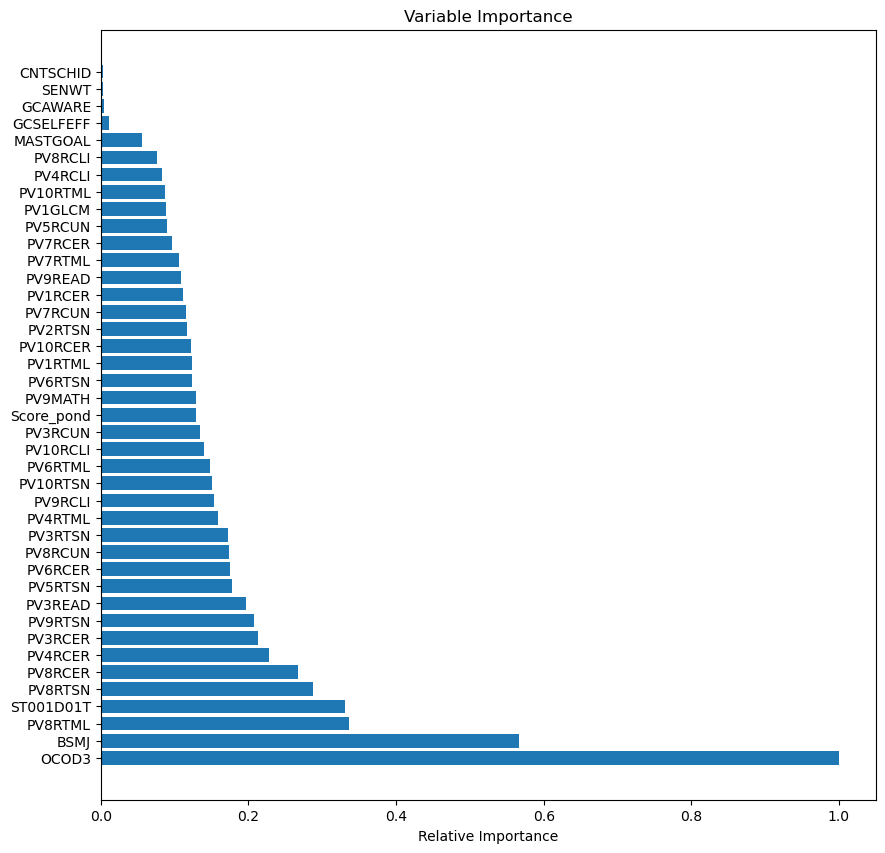

In [27]:
importances = et.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [28]:
valores = list(zip(importances[indices], features[indices]))

def clave_ordenacion(tupla):
  return (-tupla[0], tupla[1])

sorted(valores, key=clave_ordenacion)

[(1.0, 'OCOD3'),
 (0.5667501488970268, 'BSMJ'),
 (0.33590521490028236, 'PV8RTML'),
 (0.33044042709971133, 'ST001D01T'),
 (0.28729536755874724, 'PV8RTSN'),
 (0.2670780897889028, 'PV8RCER'),
 (0.22847204778972333, 'PV4RCER'),
 (0.21286488434530224, 'PV3RCER'),
 (0.20759768961669636, 'PV9RTSN'),
 (0.19664343098453113, 'PV3READ'),
 (0.17818972430201427, 'PV5RTSN'),
 (0.17490597643185563, 'PV6RCER'),
 (0.17381192444699628, 'PV8RCUN'),
 (0.1721785314069961, 'PV3RTSN'),
 (0.15920665171455245, 'PV4RTML'),
 (0.1535999532993194, 'PV9RCLI'),
 (0.15080743100238647, 'PV10RTSN'),
 (0.14820146123410102, 'PV6RTML'),
 (0.13926773602340686, 'PV10RCLI'),
 (0.13387603929420874, 'PV3RCUN'),
 (0.12927039638718768, 'Score_pond'),
 (0.12846303317383917, 'PV9MATH'),
 (0.12402952735467077, 'PV6RTSN'),
 (0.12343345467383837, 'PV1RTML'),
 (0.1217085938724413, 'PV10RCER'),
 (0.11723229019920282, 'PV2RTSN'),
 (0.11502111271374944, 'PV7RCUN'),
 (0.1116411829493466, 'PV1RCER'),
 (0.10829521510205567, 'PV9READ'),
 (0.

In [29]:
from joblib import dump, load
dump(dt, 'dt.joblib') 
dump(rf, 'rf.joblib') 
dump(et, 'et.joblib') 

['et.joblib']

In [30]:
#!pip install pipreqs

In [31]:
#!pip freeze > requirements.txt

In [32]:
#!pip freeze 

In [33]:
""" %%writefile requirements.txt

apache-beam[gcp]==2.24.0
tensorflow
gensim==3.6.0
fsspec==0.8.4
gcsfs==0.7.1
numpy==1.20.0 """

' %%writefile requirements.txt\n\napache-beam[gcp]==2.24.0\ntensorflow\ngensim==3.6.0\nfsspec==0.8.4\ngcsfs==0.7.1\nnumpy==1.20.0 '

In [34]:
#!pip install -r requirements.txt